# Ficha técnica

__Keyname:__ TPC 7  
__Título:__ Manipulação de base de dados  
__Data de início:__ 2021/11/25  
__Data de fim:__ 2021/12/02  
__Supervisor:__ [José Carlos Leite Ramalho](https://algoritmi.uminho.pt/user/jose-carlos-leite-ramalho/)  
__Autora:__ Adriana Meireles Miranda, a95126    
__Resumo:__ Neste trabalho irei concluir o trabalho realizado na aula prática (2021/11/25) onde fizemos exercícios sobre leitura de datasets, seu processamento e produção de dados estatísticos.

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de alunos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
id_aluno,nome,curso,tpc1,tpc2,tpc3,tpc4
"a1","Aysha Melanie Gilberto","LEI",12,8,19,8
"a2","Igor André Cantanhede","ENGFIS",12,16,18,20
"a3","Laurénio Narciso","ENGFIS",8,14,15,14
"a4","Jasnoor Casegas","LCC",14,20,17,11
"a5","Tawseef Rebouças","ENGBIOM",13,14,13,17
"a6","Eryk Clementino","LEI",10,19,11,14
...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

In [1]:
import os
print(os.getcwd())

C:\Users\HPAdmin\Desktop\UNI\2º ANO\1ºsemestre\ATP\Aulas TP


In [3]:
#BDAlunos=[Alunos]
#Aluno={id:"...", nome:"...", curso:"...", tpc:[int]}

# Leitura/carregamento da informação do ficheiro
def lerDataset(fnome):
    bd=[]
    f=open(fnome,encoding="utf-8")
    f.readline()#Vai ler já a primeira linha de forma a que quando entrar no ciclo de for já esteje a ler a partir da mesma
    for linha in f: #Já vai iterar na segunda linha
        novaLinha= linha.replace("\n","") #Tirar o "\n" de maneira universal
        campos=novaLinha.split(",")
        aluno={}
        aluno["id"]=campos[0]
        aluno["nome"]=campos[1]
        aluno["curso"]=campos[2]
        listaTPC=[]
        for tpc in campos[3:]: #Lista de inteiros
            listaTPC.append(int(tpc))
        aluno["tpc"]=listaTPC #do 3º índice até ao fim
        bd.append(aluno)
    return bd

In [4]:
BDalunos= lerDataset("alunos.csv")
print(BDalunos)

[{'id': '"a1"', 'nome': '"Aysha Melanie Gilberto"', 'curso': '"LEI"', 'tpc': [12, 8, 19, 8]}, {'id': '"a2"', 'nome': '"Igor André Cantanhede"', 'curso': '"ENGFIS"', 'tpc': [12, 16, 18, 20]}, {'id': '"a3"', 'nome': '"Laurénio Narciso"', 'curso': '"ENGFIS"', 'tpc': [8, 14, 15, 14]}, {'id': '"a4"', 'nome': '"Jasnoor Casegas"', 'curso': '"LCC"', 'tpc': [14, 20, 17, 11]}, {'id': '"a5"', 'nome': '"Tawseef Rebouças"', 'curso': '"ENGBIOM"', 'tpc': [13, 14, 13, 17]}, {'id': '"a6"', 'nome': '"Eryk Clementino"', 'curso': '"LEI"', 'tpc': [10, 19, 11, 14]}, {'id': '"a7"', 'nome': '"Ianna Noivo"', 'curso': '"ENGBIOM"', 'tpc': [15, 15, 17, 16]}, {'id': '"a8"', 'nome': '"Ayla Thaissa Reina"', 'curso': '"ENGBIOM"', 'tpc': [12, 8, 8, 18]}, {'id': '"a9"', 'nome': '"Cássia Viviane Coitã"', 'curso': '"ENGFIS"', 'tpc': [19, 9, 14, 10]}, {'id': '"a10"', 'nome': '"Koby Vindima"', 'curso': '"LEI"', 'tpc': [9, 14, 20, 13]}, {'id': '"a11"', 'nome': '"Gustavo Martim Hernandez"', 'curso': '"ENGBIOM"', 'tpc': [11, 

## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação.
Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [7]:
# Listagem da informação
def listarDataset(bd):
    print("  id   |    nome    |    curso    |     tpcs")
    print("---------------------------------------------")
    for a in bd:
        print(a["id"] + "|" + a["nome"] + "|" + a["curso"] + "|" + str(a["tpc"]))

In [6]:
listarDataset(BDalunos)

  id   |    nome    |    curso    |     tpcs
---------------------------------------------
"a1"|"Aysha Melanie Gilberto"|"LEI"|[12, 8, 19, 8]
"a2"|"Igor André Cantanhede"|"ENGFIS"|[12, 16, 18, 20]
"a3"|"Laurénio Narciso"|"ENGFIS"|[8, 14, 15, 14]
"a4"|"Jasnoor Casegas"|"LCC"|[14, 20, 17, 11]
"a5"|"Tawseef Rebouças"|"ENGBIOM"|[13, 14, 13, 17]
"a6"|"Eryk Clementino"|"LEI"|[10, 19, 11, 14]
"a7"|"Ianna Noivo"|"ENGBIOM"|[15, 15, 17, 16]
"a8"|"Ayla Thaissa Reina"|"ENGBIOM"|[12, 8, 8, 18]
"a9"|"Cássia Viviane Coitã"|"ENGFIS"|[19, 9, 14, 10]
"a10"|"Koby Vindima"|"LEI"|[9, 14, 20, 13]
"a11"|"Gustavo Martim Hernandez"|"ENGBIOM"|[11, 8, 14, 11]
"a12"|"Siddarta Beiriz"|"LEI"|[17, 10, 16, 16]
"a13"|"Daniela Patrícia Montes"|"ENGBIOM"|[15, 15, 18, 19]
"a14"|"Kaylla Pessego"|"LCC"|[10, 14, 17, 15]
"a15"|"Bianca Cristina Primitivo"|"ENGBIOM"|[16, 9, 18, 10]
"a16"|"Magna Galhardo"|"ENGFIS"|[20, 18, 9, 14]
"a17"|"Grace Isabel Patriarca"|"LCC"|[19, 13, 9, 10]
"a18"|"Saubhagya Buco"|"LEI"|[18, 18, 17, 8]
"

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um aluno, coloca a sua informação no monitor. Para além disso, indica também a média dos TPC realizados.

In [12]:
def consultarDataset(bd, id):
    for a in bd:
        if (str(id)==a["id"].replace('"','')):
            return(a["id"]+"|"+a["nome"]+"|"+a["curso"]
                 +"|"+str(sum(a["tpc"])/len(a["tpc"])))
idaluno=str(input("Introduza o Id do aluno:"))
print(consultarDataset(BDalunos,idaluno))

Introduza o Id do aluno:a5
"a5"|"Tawseef Rebouças"|"ENGBIOM"|14.25


## Top 10 (exercício 4)

Especifica um função que dá como resultado uma lista com os alunos com as 10 médias mais altas: id, nome, curso, média.

In [13]:
def top10(bd):
    listaMedia=[]
    for a in bd:
        a["tpc"]= sum(a["tpc"])/len(a["tpc"])
        listaMedia.append(a["tpc"])
        listaMedia.sort()
        listaMedia.reverse()
    n=0
    while(n<10):
        for a in bd:
            if listaMedia[n]==a["tpc"] and n<10:
                n=n+1
                print(a["id"] + "|" + a["nome"] + "|" + a["curso"] + "|" + str(a["tpc"]))              
top10(lerDataset("alunos.csv"))

"a47"|"Moisés João Cornelio"|"LEI"|18.0
"a80"|"Maria Carolina Josué"|"ENGFIS"|18.0
"a32"|"Ariane Sofia Foja"|"LEI"|17.5
"a74"|"Vânia Sofia Porfirio"|"ENGBIOM"|17.5
"a56"|"Hakeem Brazão"|"LEI"|17.25
"a84"|"Laudário Frasão"|"LCC"|17.0
"a13"|"Daniela Patrícia Montes"|"ENGBIOM"|16.75
"a41"|"Lachezar Rosas"|"ENGBIOM"|16.75
"a45"|"Imayame Hespanha"|"ENGFIS"|16.75
"a60"|"Mariana Catarina Ramalheira"|"ENGBIOM"|16.5


## Distribuição por curso (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos alunos há em cada curso.

In [16]:
def distribPorCurso(bd): #Os dicionários premitem tratar os dados em várias situações
    distribuicao={}
    for a in bd:
        if(a['curso'] in distribuicao.keys()):
            distribuicao[a['curso']]+=1
        else:
            distribuicao[a['curso']]=1
    return distribuicao

In [17]:
mydistrib = distribPorCurso(BDalunos)
print(mydistrib)

{'"LEI"': 23, '"ENGFIS"': 32, '"LCC"': 20, '"ENGBIOM"': 25}


## Distribuição por médias (exercício 6)

Especifica uma função que dá como resultado uma lista de pares, média e número de alunos com essa média (considera o valor inteiro da média).

In [18]:
import collections
def distribPorMedia(bd):
    media={}
    for a in bd:
        medias=int(sum(a["tpc"])/len(a["tpc"]))
        if(medias in media.keys()):
            media[medias]+=1
        else:
            media[medias]=1
    result = collections.OrderedDict(sorted(media.items()))
    media=dict(result)
    return media

In [19]:
mydistribmed=distribPorMedia(BDalunos)
print(mydistribmed)

{9: 2, 10: 1, 11: 9, 12: 15, 13: 20, 14: 21, 15: 15, 16: 11, 17: 4, 18: 2}


# Gráficos

## Gráfico da distribuição por curso (exercício 7)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por curso.

In [26]:
import matplotlib.pyplot as plt
def plotDistribPorCurso(distrib):
    cursos = distrib.keys()
    nAlunos = distrib.values()
    plt.xlabel("Cursos")
    plt.ylabel("Nº de alunos")
    plt.title("Distribuição por curso:")
    plt.bar(cursos,nAlunos, color=["pink", "red"])

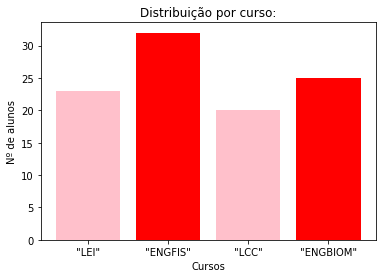

In [27]:
plotDistribPorCurso(distribPorCurso(lerDataset("alunos.csv")))

## Gráfico da distribuição por média (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por média.

In [29]:
def plotDistribPorMedia(medias):
    import matplotlib.pyplot as plt
 

    left = [1, 2, 3, 4,5,6,7,8,9,10]
 
    height = [mydistribmed[9],mydistribmed[10] ,mydistribmed[11],mydistribmed[12],
              mydistribmed[13],mydistribmed[14],mydistribmed[15],mydistribmed[16],mydistribmed[17],mydistribmed[18]]
 
    tick_label = [9,10,11,12,13,14,15,16,17,18]

    plt.bar(left, height, tick_label = tick_label, #Tá a dar o nome as barras
            width = 0.8, color = ['orange', 'gold']) #largura da barra e cor delas
 
   
    plt.xlabel('Média')

    plt.ylabel('Nº de alunos')
 
    plt.title('Distribuição de alunos por Média')
 
    plt.show()

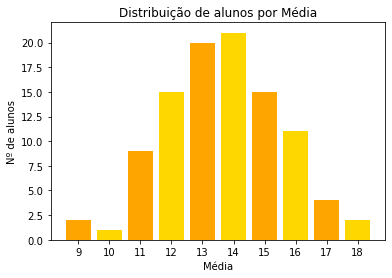

In [30]:
plotDistribPorMedia(mydistribmed)